# pyrepo-mcda Python library
## Simulation testing environment for investigating effects of criteria weights modification

Import necessary Python packages and sample visualization methods for charts displaying from visualizations.py, which provided in examples

In [1]:
import numpy as np
import pandas as pd
import copy
from tabulate import tabulate
import itertools
from visualizations import *

Import necessary modules and methods from pyrepo-mcda package

In [2]:
from pyrepo_mcda import distance_metrics as dists
from pyrepo_mcda import correlations as corrs
from pyrepo_mcda import normalizations as norms

from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda.mcda_methods import CODAS, TOPSIS, WASPAS, VIKOR, SPOTIS, EDAS, MABAC, MULTIMOORA
from pyrepo_mcda.sensitivity_analysis import Sensitivity_analysis_weights

## Loading the input data

In [3]:
# load name of a file with input data in csv file
data = pd.read_csv('data.csv', index_col = 'Ai')

df_data = data.iloc[:len(data) - 2, :]
weights = data.iloc[len(data) - 2, :].to_numpy()
types = data.iloc[len(data) - 1, :].to_numpy()

list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
matrix = df_data.to_numpy()

Create a list named **distance_metrics** with methods for determining distance metrics from module **distance_metrics**. Then prepare a list named **distance_metrics_names** with capitalized distance metrics' names. Uncomment necessary distance metrics and comment on these metrics that are not needed actually.

In [4]:
distance_metrics = [
    dists.euclidean,
    dists.manhattan,
    #dists.hausdorff,
    #dists.correlation,
    dists.chebyshev,
    #dists.std_euclidean,
    #dists.cosine,
    #dists.squared_euclidean,
    dists.bray_curtis,
    #dists.canberra,
    dists.lorentzian,
    dists.jaccard,
    dists.dice,
    #dists.bhattacharyya,
    #dists.hellinger,
    dists.matusita,
    #dists.squared_chord,
    #dists.pearson_chi_square,
    #dists.square_chi_square
    ]

distance_metrics_names = []

for el in distance_metrics:
    name = el.__name__.capitalize()
    name = name.replace('_', ' ')
    distance_metrics_names.append(name)

## Collecting results before weights modification
Collecting results for weights given by the decision-maker (without weights modification) in dataframes.

In [5]:
# collecting results for weights given by the decision-maker
# dataframe for TOPSIS rankings using different distance metrics
rank_results_topsis = pd.DataFrame()
rank_results_topsis['Ai'] = list_alt_names

# dataframe for TOPSIS preferences
pref_results_topsis = copy.deepcopy(rank_results_topsis)
# dataframe for CODAS rankings
rank_results_codas = copy.deepcopy(rank_results_topsis)
# dataframe for CODAS preferences
pref_results_codas = copy.deepcopy(rank_results_topsis)
# dataframe for rank results provided by all methods without weights changing
rank_results = copy.deepcopy(rank_results_topsis)

Collect results for weights given by the decision-maker (without weights modification) for applying different distance metrics from the list named **distance_metrics** created previously. This step is performed for TOPSIS and CODAS because they determine distance from reference solutions using distance metrics.

In [6]:
# results provided by TOPSIS and CODAS without weights changing using different distance metrics
for metric in distance_metrics:
    topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = metric)
    pref = topsis(matrix, weights, types)
    rank = rank_preferences(pref, reverse = True)
    pref_results_topsis[metric.__name__] = pref
    rank_results_topsis[metric.__name__] = rank

    codas = CODAS(normalization_method = norms.linear_normalization, distance_metric = metric)
    pref = codas(matrix, weights, types)
    rank = rank_preferences(pref, reverse = True)
    pref_results_codas[metric.__name__] = pref
    rank_results_codas[metric.__name__] = rank

Collect results for weights given by the decision-maker (without weights modification) for all MCDM methods provided by this library with default settings.

In [7]:
# results provided by all methods without weights changing
#TOPSIS
topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)
pref = topsis(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['TOPSIS'] = rank

#CODAS
codas = CODAS(normalization_method = norms.linear_normalization, distance_metric = dists.euclidean)
pref = codas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['CODAS'] = rank

#VIKOR
vikor = VIKOR(normalization_method = norms.minmax_normalization)
pref = vikor(matrix, weights, types)
rank = rank_preferences(pref, reverse = False)
rank_results['VIKOR'] = rank

#SPOTIS
bounds_min = np.amin(matrix, axis = 0)
bounds_max = np.amax(matrix, axis = 0)
bounds = np.vstack((bounds_min, bounds_max))
spotis = SPOTIS()
pref = spotis(matrix, weights, types, bounds)
rank = rank_preferences(pref, reverse = False)
rank_results['SPOTIS'] = rank

#EDAS
edas = EDAS()
pref = edas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['EDAS'] = rank

#MABAC
mabac = MABAC(normalization_method = norms.minmax_normalization)
pref = mabac(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['MABAC'] = rank

#MULTIMOORA
multimoora = MULTIMOORA()
rank = multimoora(matrix, weights, types)
rank_results['MMOORA'] = rank

#WASPAS
waspas = WASPAS(normalization_method = norms.linear_normalization, lambda_param = 0.5)
pref = waspas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
rank_results['WASPAS'] = rank

rank_results = rank_results.set_index('Ai')
header = [rank_results.index.name]
header = header + list(rank_results.columns)
print('Results of all methods without weights modification:')
print(tabulate(rank_results, headers = header, tablefmt='github'))

Results of all methods without weights modification:
| Ai      |   TOPSIS |   CODAS |   VIKOR |   SPOTIS |   EDAS |   MABAC |   MMOORA |   WASPAS |
|---------|----------|---------|---------|----------|--------|---------|----------|----------|
| $A_{1}$ |        1 |       1 |       1 |        1 |      1 |       1 |        1 |        1 |
| $A_{2}$ |        4 |       2 |       5 |        3 |      2 |       3 |        2 |        2 |
| $A_{3}$ |        2 |       3 |       2 |        2 |      3 |       2 |        3 |        3 |
| $A_{4}$ |        6 |       5 |       6 |        6 |      6 |       6 |        5 |        5 |
| $A_{5}$ |        5 |       6 |       4 |        5 |      5 |       5 |        4 |        6 |
| $A_{6}$ |        3 |       4 |       3 |        4 |      4 |       4 |        3 |        4 |


Create dictionaries for collecting results of simulations for different criteria weights. Dictionaries are necessary for appending single results for given weight modification.

In [8]:
# dictionaries for collecting data obtained in simulations
# dictionary for collecting changes in TOPSIS rankings using different distance metrics
results_dict_topsis_rank = {
    'Distance metric' : [],
    'Changes' : [],
    'Weight change' : []
    }

# dictionary for collecting variability in TOPSIS preferences after weights change using different distance metrics
results_dict_topsis_pref = {
    'Distance metric' : [],
    'Distance' : [],
    'Weight change' : []
    }

# dictionary for collecting changes in all methods rankings
results_dict_rank = {
    'Method' : [],
    'Changes' : [],
    'Weight change' : []
    }

results_dict_codas_rank = copy.deepcopy(results_dict_topsis_rank)
results_dict_codas_pref = copy.deepcopy(results_dict_topsis_pref)


# dictionary for collecting the distances of the alternatives from the ideal solution (TOPSIS)
results_dict_topsis_dist_to_ideal = {
    'r$A_{i}$' : [],
    'Distance to ideal' : [],
    'Weight change' : []
    }

# dictionary for collecting the distances of the alternatives from the anti-ideal solution (CODAS)
results_dict_codas_dist_to_nonideal = {
    'r$A_{i}$' : [],
    'Distance to anti-ideal' : [],
    'Weight change' : []
    }

## Functions for simulations
Functions for weights modifications during simulations. Variable **change_val** represents the value by which weights of criterion $C_j$ will be modified. The sign of this value is set while passing it to this function, so it performs increasing and decreasing given weights depending on the sign. The values of the other weights are changed appropriately and equally so that the sum of all weights is still 1.

Function for collecting a number of changes in rankings with weights modification for all MCDMs methods with default settings (Simulation 1).

In [9]:
# Function for Simulation 1: collecting of changes in rankings for all MCDA methods
# Simulation for all MCDA methods - variability in rankings
# changes in rankings according to changes in weights
def complete_dataframe_methods(matrix, weights_copy, types, change_val):
    #TOPSIS
    topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)
    pref = topsis(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = True)

    results_dict_rank['Method'].append('TOPSIS')
    num_of_changes = np.sum(abs(rank - rank_results['TOPSIS'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #CODAS
    codas = CODAS(normalization_method = norms.linear_normalization, distance_metric = dists.euclidean)
    pref = codas(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = True)

    results_dict_rank['Method'].append('CODAS')
    num_of_changes = np.sum(abs(rank - rank_results['CODAS'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #VIKOR
    vikor = VIKOR(normalization_method = norms.minmax_normalization)
    pref = vikor(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = False)

    results_dict_rank['Method'].append('VIKOR')
    num_of_changes = np.sum(abs(rank - rank_results['VIKOR'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #SPOTIS
    bounds_min = np.amin(matrix, axis = 0)
    bounds_max = np.amax(matrix, axis = 0)
    bounds = np.vstack((bounds_min, bounds_max))
    spotis = SPOTIS()
    pref = spotis(matrix, weights_copy, types, bounds)
    rank = rank_preferences(pref, reverse = False)

    results_dict_rank['Method'].append('SPOTIS')
    num_of_changes = np.sum(abs(rank - rank_results['SPOTIS'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #EDAS
    edas = EDAS()
    pref = edas(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = True)

    results_dict_rank['Method'].append('EDAS')
    num_of_changes = np.sum(abs(rank - rank_results['EDAS'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #MABAC
    mabac = MABAC(normalization_method = norms.minmax_normalization)
    pref = mabac(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = True)

    results_dict_rank['Method'].append('MABAC')
    num_of_changes = np.sum(abs(rank - rank_results['MABAC'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #MULTIMOORA
    multimoora = MULTIMOORA()
    rank = multimoora(matrix, weights_copy, types)
    results_dict_rank['Method'].append('MMOORA')
    num_of_changes = np.sum(abs(rank - rank_results['MMOORA'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #WASPAS
    waspas = WASPAS(normalization_method = norms.linear_normalization, lambda_param = 0.5)
    pref = waspas(matrix, weights_copy, types)
    rank = rank_preferences(pref, reverse = True)

    results_dict_rank['Method'].append('WASPAS')
    num_of_changes = np.sum(abs(rank - rank_results['WASPAS'].to_numpy()))
    results_dict_rank['Changes'].append(num_of_changes)
    results_dict_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

Function for collecting distance of the alternatives from the ideal solution (TOPSIS) and the anti-ideal solution (CODAS) with weights modification for TOPSIS and CODAS default settings (Simulation 2).

In [10]:
# Function for Simulation 2: collecting of distances to reference points
# the distance of the alternatives from the ideal solution (TOPSIS) and the anti-ideal solution (CODAS)
def complete_dataframe_distance(matrix, weights_copy, types, change_val):
    #TOPSIS
    topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)
    pref = topsis(matrix, weights_copy, types)
    rankingPrep = np.argsort(-pref)
    rank = rank_preferences(pref, reverse = True)
    dp = topsis.Dp

    for r in range(len(rank)):
        results_dict_topsis_dist_to_ideal['r$A_{i}$'].append(list_alt_names[rankingPrep[r]])
        results_dict_topsis_dist_to_ideal['Distance to ideal'].append(dp[rankingPrep[r]])
        results_dict_topsis_dist_to_ideal['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

    #CODAS
    codas = CODAS(normalization_method = norms.minmax_normalization, distance_metric = dists.euclidean)
    pref = codas(matrix, weights_copy, types)
    rankingPrep = np.argsort(-pref)
    rank = rank_preferences(pref, reverse = True)
    e = codas.E


    for r in range(len(rank)):
        results_dict_codas_dist_to_nonideal['r$A_{i}$'].append(list_alt_names[rankingPrep[r]])
        results_dict_codas_dist_to_nonideal['Distance to anti-ideal'].append(e[rankingPrep[r]])
        results_dict_codas_dist_to_nonideal['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

Function for collecting the number of changes in rankings and variability of preference values in simulations with weights modification for TOPSIS and CODAS with applying different distance metrics (Simulation 3). In this example, the distance between preferences determined for given weights and modified weights is calculated using the Manhattan distance. This metric is assigned to **distance_measurement_method** as argument of function given below. However, any metric from distance_metrics can be used for this purpose.

In [11]:
# Function for Simulation 3 and 4: collecting of changes in preferences in rankings for TOPSIS and CODAS
# choose distance measurement method, for example, manhattan_distance
# variability in rankings and preferences for different distance metrics for TOPSIS and CODAS
def complete_dataframe(matrix, distance_metrics, weights_copy, types, change_val, distance_measurement_method = dists.manhattan):
    for metric in distance_metrics:
        #TOPSIS
        # changes in rankings
        topsis = TOPSIS(normalization_method = norms.minmax_normalization, distance_metric = metric)
        pref = topsis(matrix, weights_copy, types)
        rank = rank_preferences(pref, reverse = True)
        metric_name = metric.__name__.capitalize()
        metric_name = metric_name.replace('_', ' ')
        results_dict_topsis_rank['Distance metric'].append(metric_name)
        num_of_changes = np.sum(abs(rank - rank_results_topsis[metric.__name__].to_numpy()))
        results_dict_topsis_rank['Changes'].append(num_of_changes)
        results_dict_topsis_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

        # changes in preferences (measured by distance metric)
        results_dict_topsis_pref['Distance metric'].append(metric_name)
        dist = distance_measurement_method(pref, pref_results_topsis[metric.__name__].to_numpy())
        results_dict_topsis_pref['Distance'].append(dist)
        results_dict_topsis_pref['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')


        #CODAS
        # changes in rankings
        codas = CODAS(normalization_method = norms.linear_normalization, distance_metric = metric)
        pref = codas(matrix, weights_copy, types)
        rank = rank_preferences(pref, reverse = True)
        results_dict_codas_rank['Distance metric'].append(metric_name)
        num_of_changes = np.sum(abs(rank - rank_results_codas[metric.__name__].to_numpy()))
        results_dict_codas_rank['Changes'].append(num_of_changes)
        results_dict_codas_rank['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

        # changes in preferences (measured by distance metric)
        results_dict_codas_pref['Distance metric'].append(metric_name)
        dist = distance_measurement_method(pref, pref_results_codas[metric.__name__].to_numpy())
        results_dict_codas_pref['Distance'].append(dist)
        results_dict_codas_pref['Weight change'].append('{:.0f}'.format(abs(change_val * 100)) + '%')

Performing simulations for different weights modifications using functions provided above. The list named **percentages** includes values by which weights are increased or decreased. Value 0.05 denotes 5%, 0.2 means 20%, 0.35 means 35% etc. Value 1 in **changing_weights_direction** means that the weight of a given criterion will be increased and on the other hand, -1 implies decreasing.

## Simulations

In [12]:
# Input percentages of weights modification for simulation
percentages = [0.05, 0.2, 0.35, 0.5]
list_of_percentage = ['{:.0f}'.format(p * 100) + '%' for p in percentages]
changing_weights_direction = [1, -1]


sensitivity = Sensitivity_analysis_weights()
# Simulation with weights modification
for j, change_val, dir in itertools.product(range(df_data.shape[1]), percentages, changing_weights_direction):
    weights_copy = sensitivity._change_weights(j, weights, change_val * dir)
    complete_dataframe(matrix, distance_metrics, weights_copy, types, change_val)
    complete_dataframe_distance(matrix, weights_copy, types, change_val)
    complete_dataframe_methods(matrix, weights_copy, types, change_val)

## Results visualizations
Visualization of simulations results using methods from a module named **visualizations**:
- **plot_boxplot**
- **plot_barplot_simulations**

In [13]:
# Results of simulations
#TOPSIS ranking
results_pd_topsis_rank = pd.DataFrame(results_dict_topsis_rank)
#CODAS ranking
results_pd_codas_rank = pd.DataFrame(results_dict_codas_rank)

Visualization of variability (distribution) in preferences with weights modification for TOPSIS and CODAS performed with different distance metrics in the form of box plots.

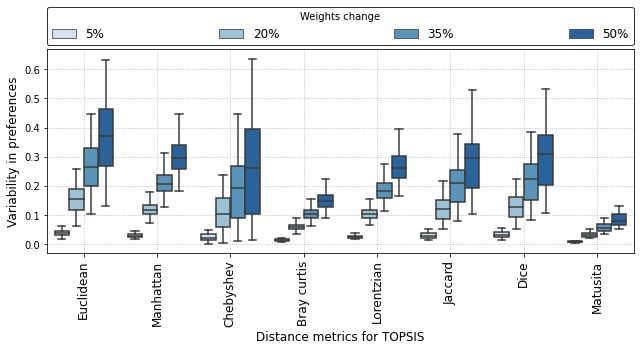

In [14]:
#TOPSIS preferences
results_pd_topsis_pref = pd.DataFrame(results_dict_topsis_pref)
plot_boxplot_simulation(results_pd_topsis_pref, x = 'Distance metric', y = 'Distance', 
             xtitle = 'Distance metrics for TOPSIS', ytitle = 'Variability in preferences', 
             title = 'TOPSIS')

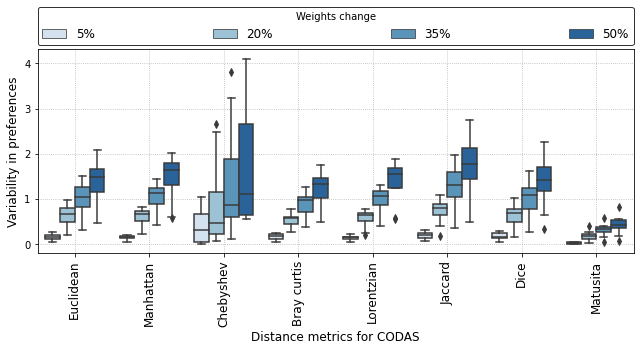

In [15]:
#CODAS preferences
results_pd_codas_pref = pd.DataFrame(results_dict_codas_pref)
plot_boxplot_simulation(results_pd_codas_pref, x = 'Distance metric', y = 'Distance', 
             xtitle = 'Distance metrics for CODAS', ytitle = 'Variability in preferences', 
             title = 'CODAS')

Visualization of distribution of alternatives' distances from reference solutions for TOPSIS (distance from ideal solution) and CODAS (distance from anti-ideal solution).

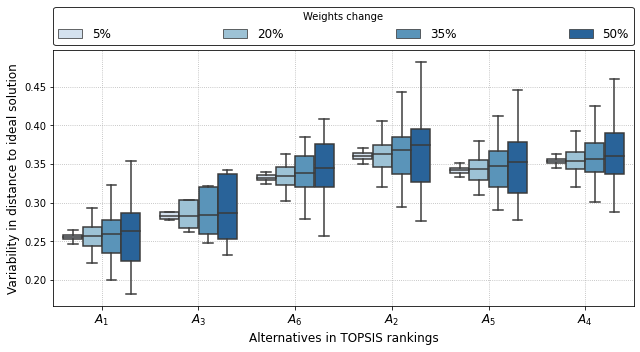

In [16]:
# distance of alternatives' from reference solution
#TOPSIS
results_pd_topsis_dist_to_ideal = pd.DataFrame(results_dict_topsis_dist_to_ideal)

plot_boxplot_simulation(results_pd_topsis_dist_to_ideal, x = 'r$A_{i}$', y = 'Distance to ideal', 
             xtitle = 'Alternatives in TOPSIS rankings', ytitle = 'Variability in distance to ideal solution', 
             title = 'TOPSIS', flag_rotation = False)

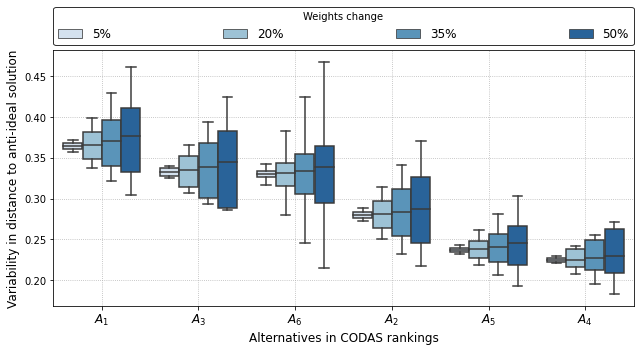

In [17]:
#CODAS
results_pd_codas_dist_to_nonideal = pd.DataFrame(results_dict_codas_dist_to_nonideal)
plot_boxplot_simulation(results_pd_codas_dist_to_nonideal, x = 'r$A_{i}$', y = 'Distance to anti-ideal', 
             xtitle = 'Alternatives in CODAS rankings', ytitle = 'Variability in distance to anti-ideal solution', 
             title = 'CODAS', flag_rotation = False)

Calculation and visualization of the average number of changes in TOPSIS and CODAS rankings for different distance metrics applied for calculating the distance from reference solutions in these methods.

In [18]:
# Average number of changes in TOPSIS ranking
df_rank_topsis_mean = pd.DataFrame()
df_rank_topsis_mean['Distance metric'] = distance_metrics_names

for perc in list_of_percentage:
    list_of_averages = []
    for el in distance_metrics_names:
        df_tmp = results_pd_topsis_rank[(results_pd_topsis_rank['Distance metric'] == el) & (results_pd_topsis_rank['Weight change'] == perc)]
        av = df_tmp['Changes'].mean()
        list_of_averages.append(av)
    df_rank_topsis_mean[perc] = list_of_averages

df_rank_topsis_mean = df_rank_topsis_mean.set_index('Distance metric')
header = [df_rank_topsis_mean.index.name]
header = header + list(df_rank_topsis_mean.columns)
print('The average number of changes in TOPSIS rankings with weights modification:')
print(tabulate(df_rank_topsis_mean, headers = header, tablefmt='github'))

The average number of changes in TOPSIS rankings with weights modification:
| Distance metric   |   5% |   20% |   35% |   50% |
|-------------------|------|-------|-------|-------|
| Euclidean         | 0    |  2.5  |  4.25 |  6    |
| Manhattan         | 0.25 |  1    |  3.5  |  4.75 |
| Chebyshev         | 0.5  |  2.75 |  4.25 |  4.5  |
| Bray curtis       | 0.25 |  1    |  3.5  |  4.75 |
| Lorentzian        | 0    |  1    |  2.75 |  4.75 |
| Jaccard           | 1.25 |  3    |  5.75 |  7.25 |
| Dice              | 1.25 |  3    |  5.75 |  7.25 |
| Matusita          | 0.25 |  2    |  3.25 |  4.25 |


In [19]:
# Average number of changes in CODAS ranking
df_rank_codas_mean = pd.DataFrame()
df_rank_codas_mean['Distance metric'] = distance_metrics_names

for perc in list_of_percentage:
    list_of_averages = []
    for el in distance_metrics_names:
        df_tmp = results_pd_codas_rank[(results_pd_codas_rank['Distance metric'] == el) & (results_pd_codas_rank['Weight change'] == perc)]
        av = df_tmp['Changes'].mean()
        list_of_averages.append(av)
    df_rank_codas_mean[perc] = list_of_averages

df_rank_codas_mean = df_rank_codas_mean.set_index('Distance metric')
header = [df_rank_codas_mean.index.name]
header = header + list(df_rank_codas_mean.columns)
print('The average number of changes in CODAS rankings with weights modification:')
print(tabulate(df_rank_codas_mean, headers = header, tablefmt='github'))

The average number of changes in CODAS rankings with weights modification:
| Distance metric   |   5% |   20% |   35% |   50% |
|-------------------|------|-------|-------|-------|
| Euclidean         | 0.25 |  0.75 |  1.75 |  2.75 |
| Manhattan         | 0    |  0.5  |  1.5  |  2.25 |
| Chebyshev         | 1.25 |  3.5  |  4    |  4.25 |
| Bray curtis       | 0    |  0.5  |  1.5  |  2.25 |
| Lorentzian        | 0    |  0.5  |  1.75 |  2.25 |
| Jaccard           | 1    |  1.25 |  2    |  2.5  |
| Dice              | 0.25 |  0.75 |  1.75 |  3    |
| Matusita          | 0    |  0.25 |  0.75 |  1    |


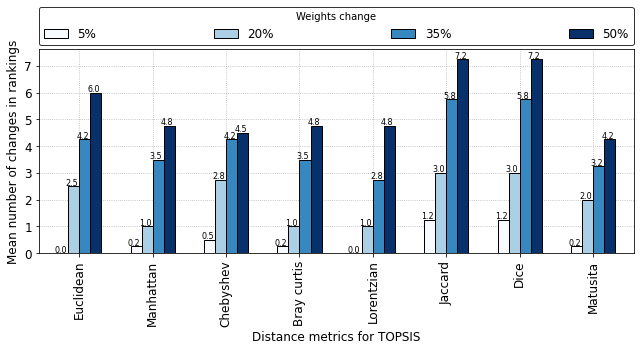

In [20]:
plot_barplot_simulations(df_rank_topsis_mean, xtitle = 'Distance metrics for TOPSIS', 
                         ytitle = 'Mean number of changes in rankings', title = 'TOPSIS', 
                         wider = True)

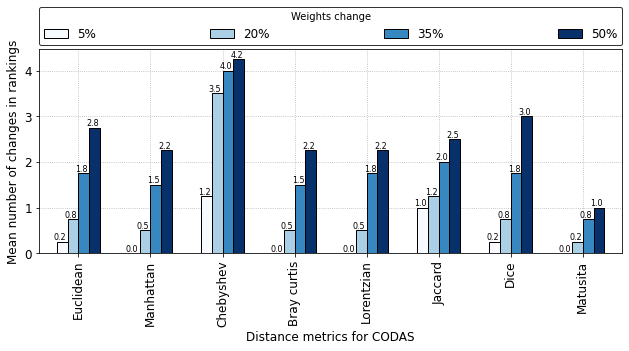

In [21]:
plot_barplot_simulations(df_rank_codas_mean, xtitle = 'Distance metrics for CODAS', 
                         ytitle = 'Mean number of changes in rankings', title = 'CODAS', 
                         wider = True)

Calculation and visualization of the average number of changes in rankings obtained with all MCDMs provided by this library with default settings.

In [22]:
# Average variability in rankings for all MCDA methods
results_df_rank = pd.DataFrame(results_dict_rank)
df_rank_mean = pd.DataFrame()
df_rank_mean['Method'] = list(rank_results.columns)

for perc in list_of_percentage:
    list_of_averages = []
    for el in list(rank_results.columns):
        df_tmp = results_df_rank[(results_df_rank['Method'] == el) & (results_df_rank['Weight change'] == perc)]
        av = df_tmp['Changes'].mean()
        list_of_averages.append(av)
    df_rank_mean[perc] = list_of_averages

df_rank_mean = df_rank_mean.set_index('Method')
header = [df_rank_mean.index.name]
header = header + list(df_rank_mean.columns)
print('The average number of changes in all rankings with weights modification:')
print(tabulate(df_rank_mean, headers = header, tablefmt='github'))

The average number of changes in all rankings with weights modification:
| Method   |   5% |   20% |   35% |   50% |
|----------|------|-------|-------|-------|
| TOPSIS   | 0    | 2.5   |  4.25 |  6    |
| CODAS    | 0.25 | 0.75  |  1.75 |  2.75 |
| VIKOR    | 1.5  | 3     |  4    |  5.75 |
| SPOTIS   | 0.25 | 1     |  3.5  |  4.75 |
| EDAS     | 0.5  | 1     |  1.25 |  2    |
| MABAC    | 0.25 | 1     |  3.5  |  4.75 |
| MMOORA   | 0    | 0.375 |  1    |  1.75 |
| WASPAS   | 0.25 | 0.75  |  1.25 |  2.5  |


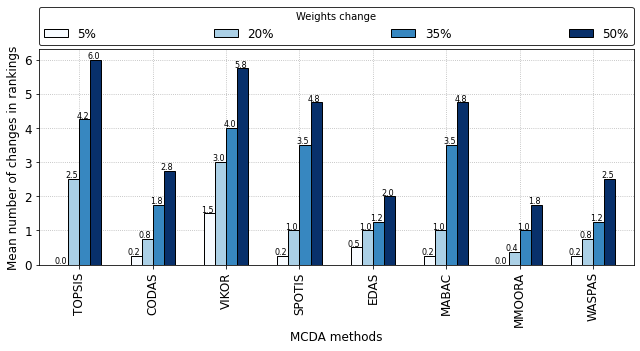

In [23]:
plot_barplot_simulations(df_rank_mean, xtitle = 'MCDA methods', 
                         ytitle = 'Mean number of changes in rankings', 
                         title = 'MCDA methods', wider = True)